# EDA

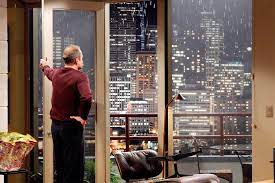

## Stakeholder
Our stakeholder is Zachary Brooks. He invested in historical houses in the best neighborhoods. He aims for high profits and wonders what the best time throughout the year is to sell his houses. Additionally he thinks about if renovations pay off.

In [1]:
import warnings
# filter warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotly in vs code
import plotly.io as pio
pio.renderers.default = "notebook"

# setting up matplotlib
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (16, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Cleaning
### Import the data
We work with the [King County Housing Data from kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv). We load the dataset and print the first five lines:

In [2]:
# Import data and check if importing worked
#df = pd.read_csv('data/kc_house_data.csv')
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


### Parsing the date
Apparently the date has a wrong format. Both yr_built and yr_renovated are ints but we will consider those later on. To facilitate working with it we parse it to datetime:

In [3]:
df.date = pd.to_datetime(df.date)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


### Understanding the data - Columns
We examine the size of the dataset and find out what information it contains.

In [4]:
df.shape

(21597, 21)

We have 21613 rows and 21 columns in our dataset. What information is contained in the columns?

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The **Column Names and descriptions for King County Data Set** as posted on kaggle:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  # of bedrooms
* **bathroomsNumber** - # of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Understanding the data - Datatypes and missing values

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Looks good! We have no missing values and all data is parsed correctly.
* datetime for the date
* float for price, bathrooms, floors, lat and long. It makes sense: We can have half bathrooms and consequently half room counts. For the price and longitude and latitude we expect floats.
* int for the rest makes sense

### Understanding the data - Duplicates
Do we have duplicates in the dataset?

In [8]:
df["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Indeed we have 177 duplicates in the dataset. Those are probably houses that were resold in that short time period. Perhaps that could give insight if this is lucrative. We keep duplicates.

### Drop columns

Some columns are unnecessary to answer our hypothesis. Therefore we can drop some information. In detail, we neglect the following columns:
* zipcode: we use the coordinates to assign the areas
* room counts: we assume that our stakeholder wants to sell a standard house and we will not consider the influence on room count on the sale price
* footage lot: the correlation is very difficult and beyond the scope of this analysis
* floors and footage for each floor: same as room counts, not considered

In [9]:
columns_to_drop = ['zipcode', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_lot15']
df.drop(columns_to_drop, axis=1, inplace=True)

### Data statistics

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
waterfront,19221.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21534.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000
grade,21597.000,7.658,1.173,3.000,7.000,7.000,8.000,13.000
yr_built,21597.000,1971.000,29.375,1900.000,1951.000,1975.000,1997.000,2015.000
yr_renovated,17755.000,83.637,399.946,0.000,0.000,0.000,0.000,2015.000
lat,21597.000,47.560,0.139,47.156,47.471,47.572,47.678,47.778


**Correlation with sale price**

Now we look for correlation with sale price.

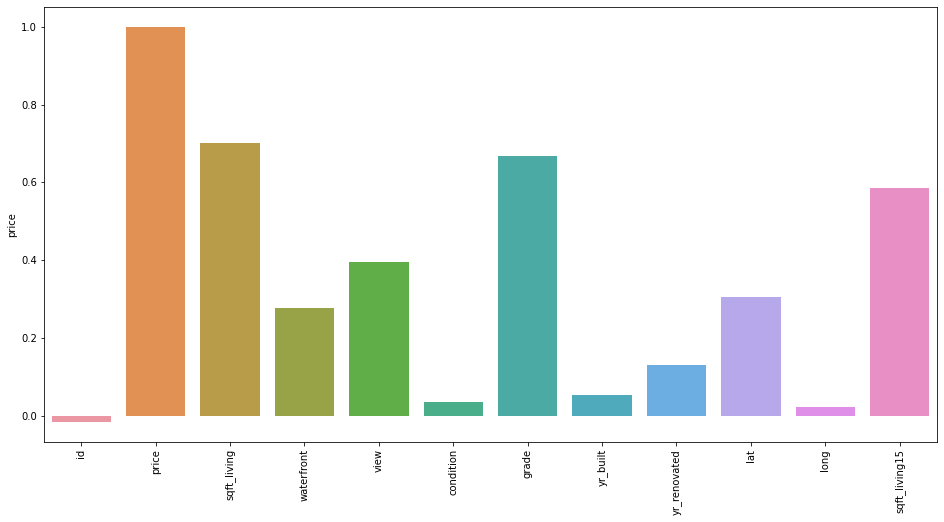

In [11]:
sns.barplot(df.corr().columns, df.corr()['price'])
plt.xticks(rotation=90);

So the price is correlated with the living area sqft_living, the grade but also the living area of the neighboring houses.

## Hypothesis generation



1. Sale prices vary over the year. There is a best time within a year when houses sale for more.
1. House prices depend on house age. Price decreases for older houses. Historical houses again increase in sale price.
1. Renovated houses sell for more. This effect is pronounced for historical houses.
1. High selling houses are clustered in a nice neighborhood. 

## Exploring the data
What is the distribution of our target? What are the distributions of the features? Do we have outliers?
### Sale price distribution
First we look on the distribution of the sale prices:

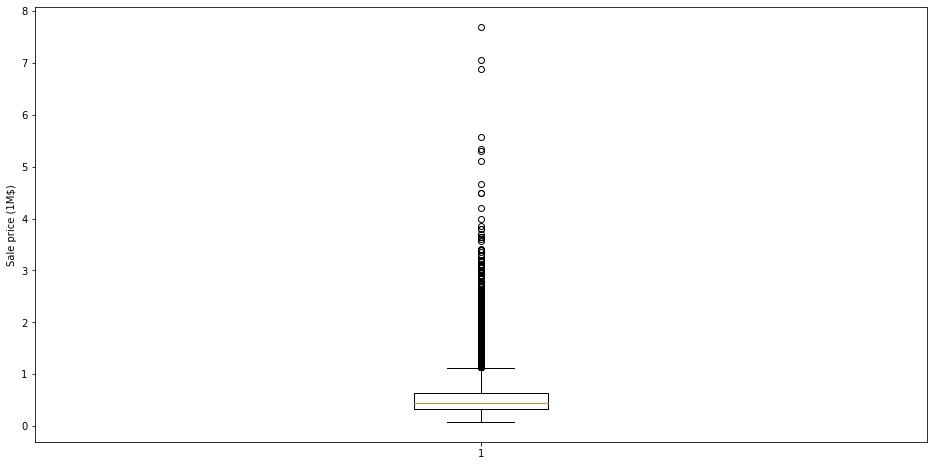

In [12]:
plt.boxplot(df.price/1e6)
plt.ylabel('Sale price (1M\$)');

We have most of our data between 0 and 1 million USD with some outliers up to around 8 million. To get a better idea of the main part of the data, we hide the outliers:

450000.0

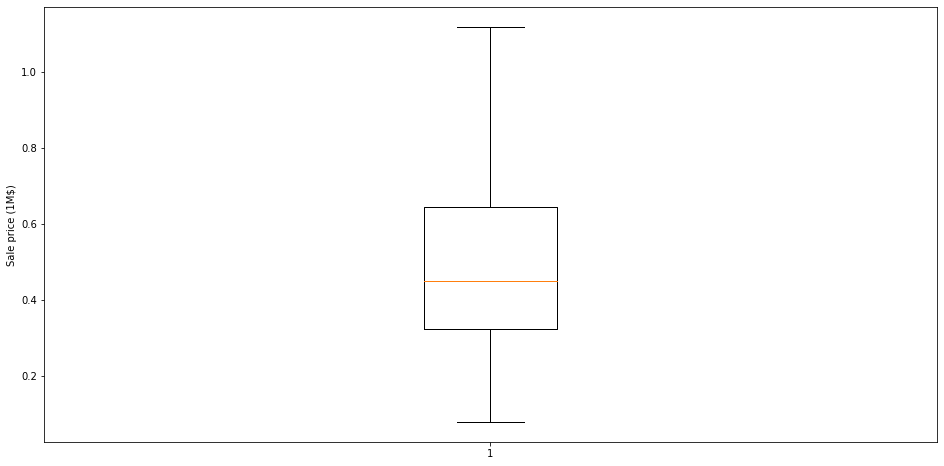

In [13]:
plt.boxplot(df.price/1e6,showfliers=False)
plt.ylabel('Sale price (1M\$)')
df.price.median()

The distribution is skewed right with most of the houses sold between 300k and 600k with the median at 450k. We have very few outliers with very high sale prices. In order to obtain a nice distribution, we remove the outliers.

We look at the distributions of the features.

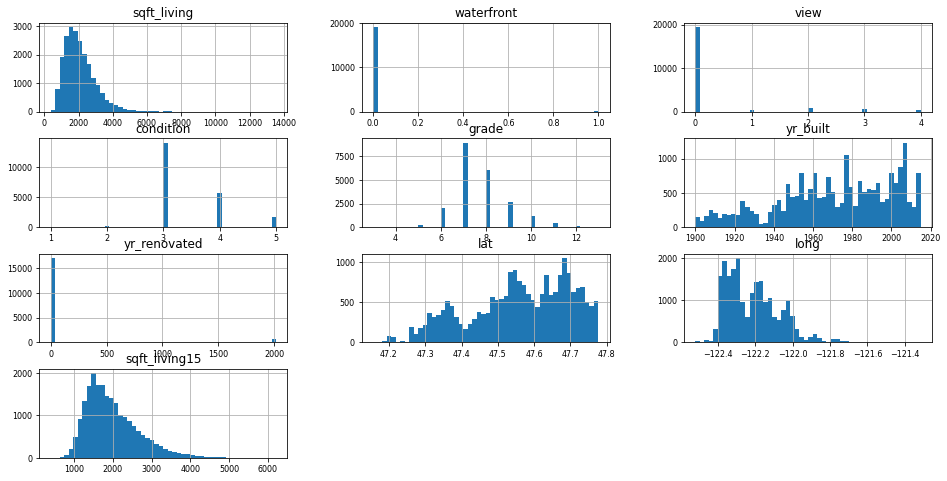

In [14]:
dist_cols = df.columns[3:]
df[dist_cols].hist(bins=50, xlabelsize=8, ylabelsize=8);

We observe a clear distinction between continuous and categorical variables:
* **continuous**
    * skewed right distribution as our target: sqft_living, sqft_above and sqft_living15
    * geographical data: three main peaks indicate, that a lot of houses are located in three geographical areas
* **categorical**
    * grade: mode at 7
    * most houses no waterfront
    * view mostly bad
    * yr_built: skewed left, relevant for us: historical houses
    * yr_renovated: skewed right. relevant for us: recent renovations

## Cleaning the data
### Dealing with nans
We assume that missing values correspond to no waterfron, bad view and no renovation. Therefore we fill all of them with the mode (0).

In [15]:
df.waterfront.fillna(df.waterfront.mode()[0], inplace=True)
df.view.fillna(df.view.mode()[0], inplace=True)
df.yr_renovated.fillna(df.yr_renovated.mode()[0], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   waterfront     21597 non-null  float64       
 5   view           21597 non-null  float64       
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   yr_built       21597 non-null  int64         
 9   yr_renovated   21597 non-null  float64       
 10  lat            21597 non-null  float64       
 11  long           21597 non-null  float64       
 12  sqft_living15  21597 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 2.1 MB


### Removing the outliers
As we have seen, a few outliers can be removed. We remove rows with very high sale prices (above the 95th percentile):

In [16]:
df_ad = df[df.price <= df.price.quantile(q=0.95)]
df_ad.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.000,1180,0.000,0.000,3,7,1955,0.000,47.511,-122.257,1340
1,6414100192,2014-12-09,538000.000,2570,0.000,0.000,3,7,1951,1991.000,47.721,-122.319,1690
2,5631500400,2015-02-25,180000.000,770,0.000,0.000,3,6,1933,0.000,47.738,-122.233,2720
3,2487200875,2014-12-09,604000.000,1960,0.000,0.000,5,7,1965,0.000,47.521,-122.393,1360
4,1954400510,2015-02-18,510000.000,1680,0.000,0.000,3,8,1987,0.000,47.617,-122.045,1800


Additionally we could remove the outliers for the square footages, but we only keep those features for sanity checks and we don't work with them towards our hypothesis.

### Transform data

First we transform the yr_built to obtain a more intuitive age. Additionally we create a feature that tells us if the house is historic, if it has been renovated and if it was recently renovated.

In [66]:
df_ad['age'] = 2016 - df_ad.yr_built
df_ad['historic'] = df_ad.age > 60
df_ad['renovated'] = df_ad.yr_renovated > 0
df_ad['recently_renovated'] = df_ad.yr_renovated > 2000
df_ad['renovated_ignore'] = (2016 - df_ad.yr_renovated).replace(2016, np.nan)
#df_ad['age_combined'] = min([df_ad.age, df_ad.renovated_ignore])
df_ad.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Price developments of assets are best described on a logarithmic scale. Buyers are willing to pay a certain percentage more for a nicer condition (e.g. 20% more). This will depend on the house price (percentage) and not on the absolute amount. Therefore we create a logarithmic price scale and check the distributions.

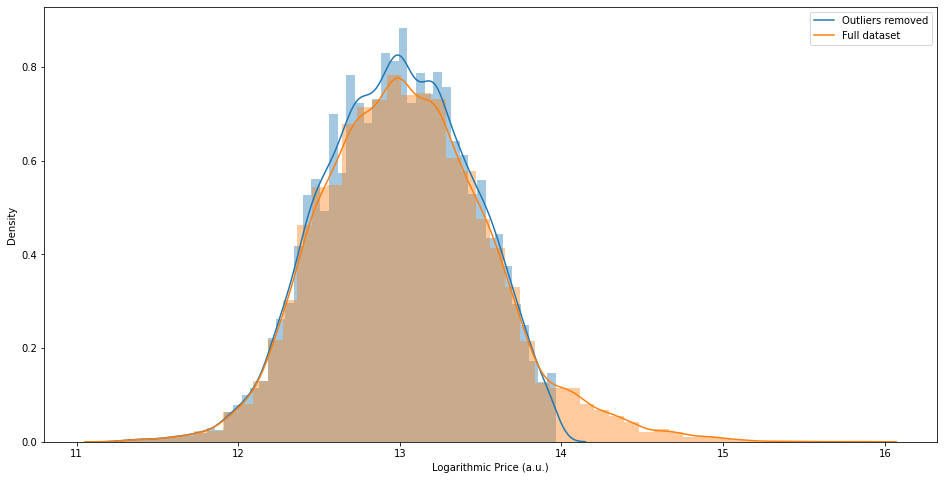

In [33]:
df['price_log'] = np.log(df.price)
df_ad['price_log'] = np.log(df_ad.price)
sns.distplot(np.log(df_ad.price))
sns.distplot(np.log(df.price))
plt.xlabel('Logarithmic Price (a.u.)')
plt.legend(['Outliers removed', 'Full dataset']);

The transformed data is closer to a normal distribution. We see the importance of removing the outliers.

### Data cleaning summary
How big is our resulting data set?

In [37]:
df_ad.groupby(['historic','renovated','recently_renovated']).size()

historic  renovated  recently_renovated
False     False      False                 14273
          True       False                    61
                     True                     76
True      False      False                  5627
          True       False                   283
                     True                    211
dtype: int64

28% (5500) of the houses are historic. Out of those, 5% (280) are renovated, most of them in the last 15 years. The dataset of renovated historic houses is very small.

## Relationships in the data

<AxesSubplot:>

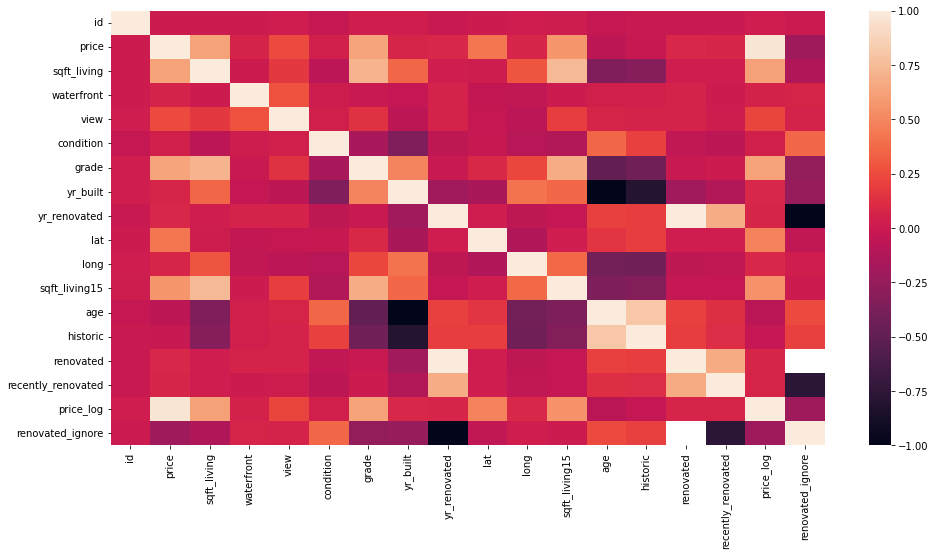

In [50]:
sns.heatmap(df_ad.corr())

<AxesSubplot:ylabel='price'>

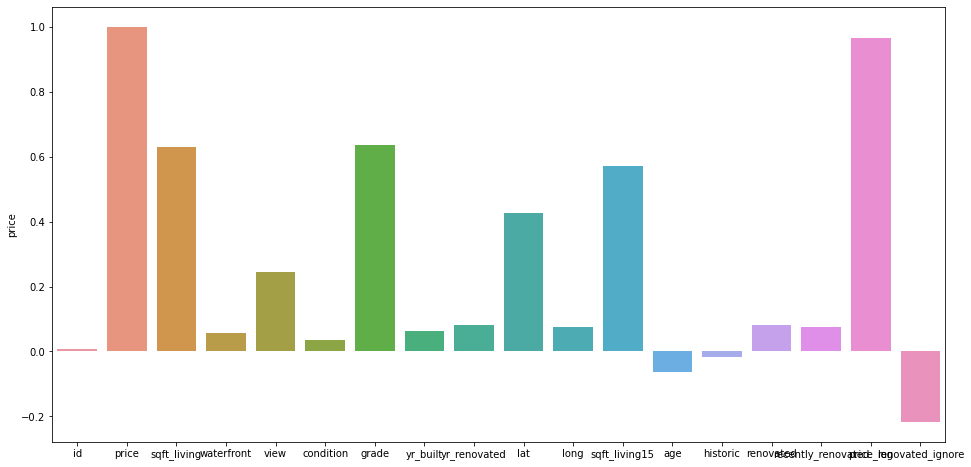

In [51]:
sns.barplot(df_ad.corr().columns, df_ad.corr()['price'])

<AxesSubplot:ylabel='price_log'>

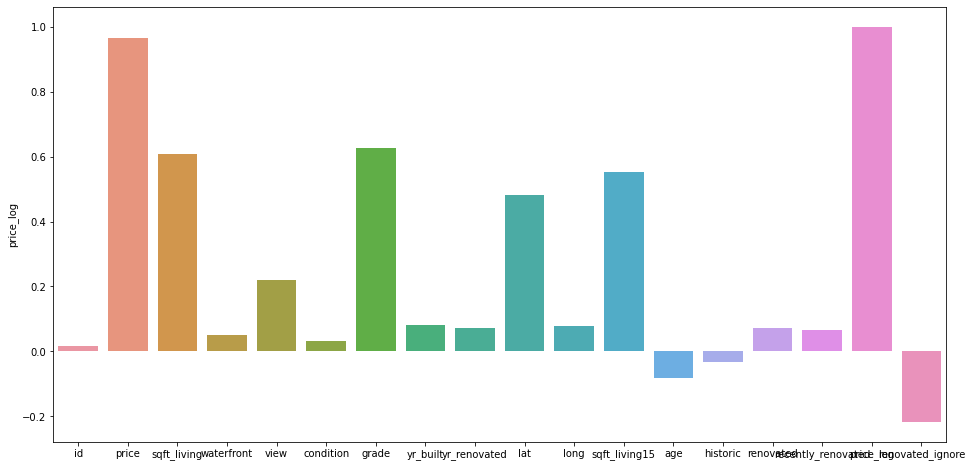

In [53]:
sns.barplot(df_ad.corr().columns,df_ad.corr()['price_log'])

In [54]:
df_ad.corr()[['price','price_log']]

,price,price_log
id,0.007,0.016
price,1.000,0.966
sqft_living,0.628,0.610
waterfront,0.057,0.050
view,0.245,0.221
condition,0.036,0.033
grade,0.637,0.627
yr_built,0.063,0.083
yr_renovated,0.082,0.073
lat,0.426,0.483


<AxesSubplot:xlabel='age', ylabel='price'>

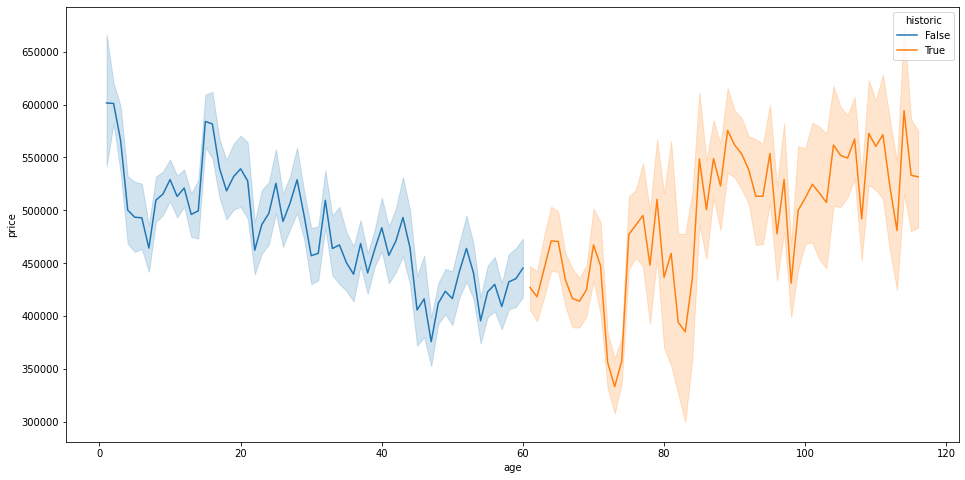

In [63]:
sns.lineplot(data=df_ad, x='age', y='price', hue='historic')
#sns.lineplot(data=df_ad, x='age', y='price', hue='renovated')
#sns.lineplot(data=df_ad, x='age', y='price', hue='recently_renovated')
#sns.scatterplot(data=df_ad, x='age', y='price', hue='renovated')
#sns.lineplot(data=df_ad, x='renovated_ignore', y='price')

In [20]:
df_ad.groupby(['historic','renovated']).mean().price

historic  renovated
False     False       481264.649
          True        579367.803
True      False       464796.828
          True        576638.905
Name: price, dtype: float64

<AxesSubplot:xlabel='renovated_ignore', ylabel='price'>

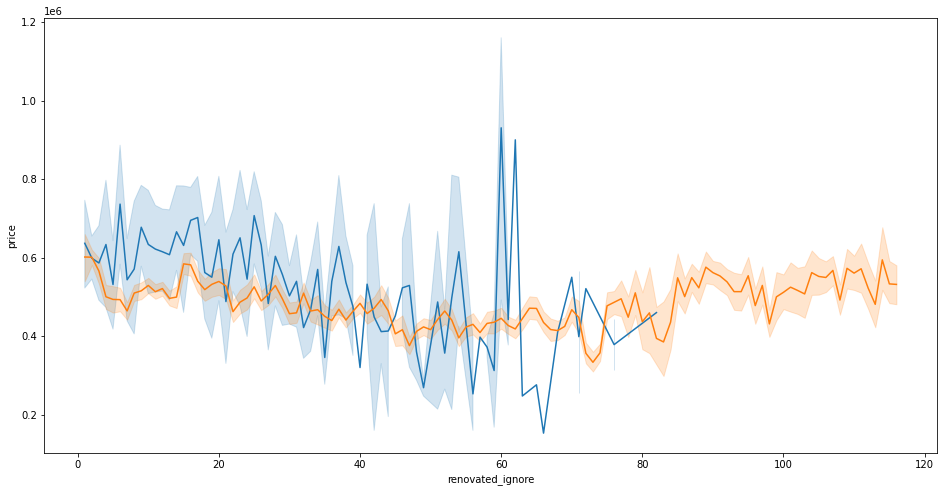

In [65]:
sns.lineplot(df_ad.renovated_ignore, df_ad.price)
sns.lineplot(data=df_ad, x='age', y='price')

In [ ]:
df.yr_renovated.replace(0, np.nan, inplace=True)
#df.yr_renovated = pd.to_datetime(df.yr_renovated)
df.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.000,1180,0,0,3,7,1955,NaN,47.511,-122.257,1340
1,6414100192,2014-12-09,538000.000,2570,0,0,3,7,1951,1991.000,47.721,-122.319,1690
2,5631500400,2015-02-25,180000.000,770,0,0,3,6,1933,NaN,47.738,-122.233,2720
3,2487200875,2014-12-09,604000.000,1960,0,0,5,7,1965,NaN,47.521,-122.393,1360
4,1954400510,2015-02-18,510000.000,1680,0,0,3,8,1987,NaN,47.617,-122.045,1800


In [ ]:
df_ad['age'] = 2016 - df_ad.yr_built
df_ad['age_ren'] = df_ad.age
df_ad.age_ren[df_ad.age_ren != 0] = 2016 - df_ad.yr_renovated
df_ad['price_log'] = np.log(df_ad.price)
df_ad.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,age,age_ren,price_log
0,7129300520,2014-10-13,221900.000,1180,0,0,3,7,1955,NaN,47.511,-122.257,1340,61,NaN,12.310
1,6414100192,2014-12-09,538000.000,2570,0,0,3,7,1951,1991.000,47.721,-122.319,1690,65,25.000,13.196
2,5631500400,2015-02-25,180000.000,770,0,0,3,6,1933,NaN,47.738,-122.233,2720,83,NaN,12.101
3,2487200875,2014-12-09,604000.000,1960,0,0,5,7,1965,NaN,47.521,-122.393,1360,51,NaN,13.311
4,1954400510,2015-02-18,510000.000,1680,0,0,3,8,1987,NaN,47.617,-122.045,1800,29,NaN,13.142


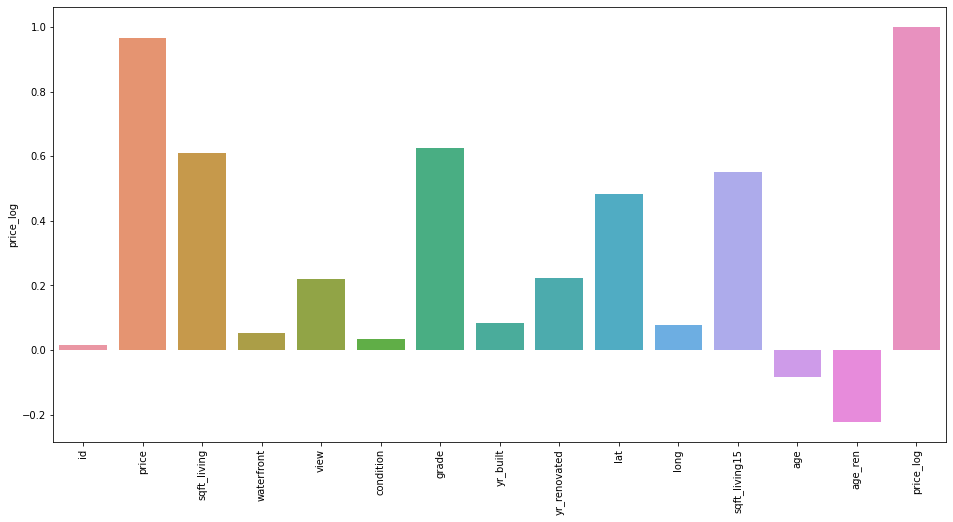

In [ ]:
sns.barplot(df_ad.corr().columns, df_ad.corr()['price_log'])
plt.xticks(rotation=90);

<AxesSubplot:xlabel='age', ylabel='price'>

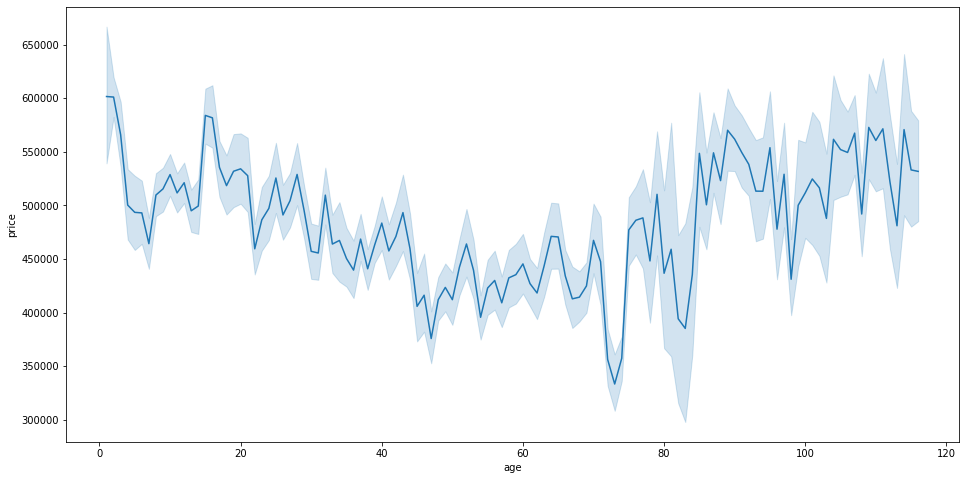

In [ ]:
sns.lineplot(df_ad.age, df_ad.price)

In [ ]:
df.waterfront.fillna(df.waterfront.mode()[0], inplace=True)
df.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.000,1180,0.000,0.000,3,7,1955,0.000,47.511,-122.257,1340
1,6414100192,2014-12-09,538000.000,2570,0.000,0.000,3,7,1951,1991.000,47.721,-122.319,1690
2,5631500400,2015-02-25,180000.000,770,0.000,0.000,3,6,1933,NaN,47.738,-122.233,2720
3,2487200875,2014-12-09,604000.000,1960,0.000,0.000,5,7,1965,0.000,47.521,-122.393,1360
4,1954400510,2015-02-18,510000.000,1680,0.000,0.000,3,8,1987,0.000,47.617,-122.045,1800


In [ ]:
df.yr_renovated.mode()

0   0.000
dtype: float64

<AxesSubplot:xlabel='long', ylabel='lat'>

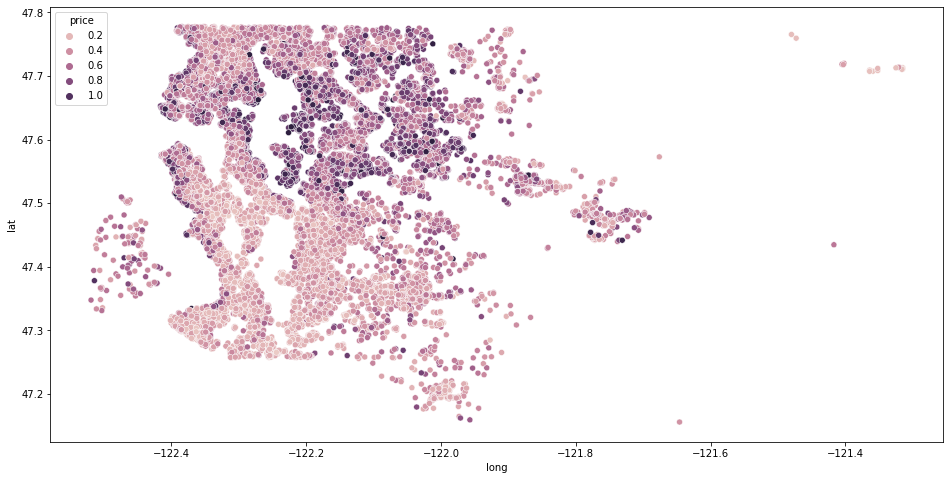

In [ ]:
sns.scatterplot(data=df_ad, x='long', y='lat', hue='price')